In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('clothing.csv')
# Data information
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None


In [5]:
# Data Head
print(data.head())

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

In [8]:
# We can see the unecessary column 'Unnamed: 0' So we can remove it
data = data.drop('Unnamed: 0', axis=1)
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [9]:
# Drop duplicates and null Values
data.drop_duplicates(inplace=True)
data.dropna()
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [10]:
data.isna().sum()

Clothing ID                   0
Age                           0
Title                      3789
Review Text                 825
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [11]:
data.nunique()

Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

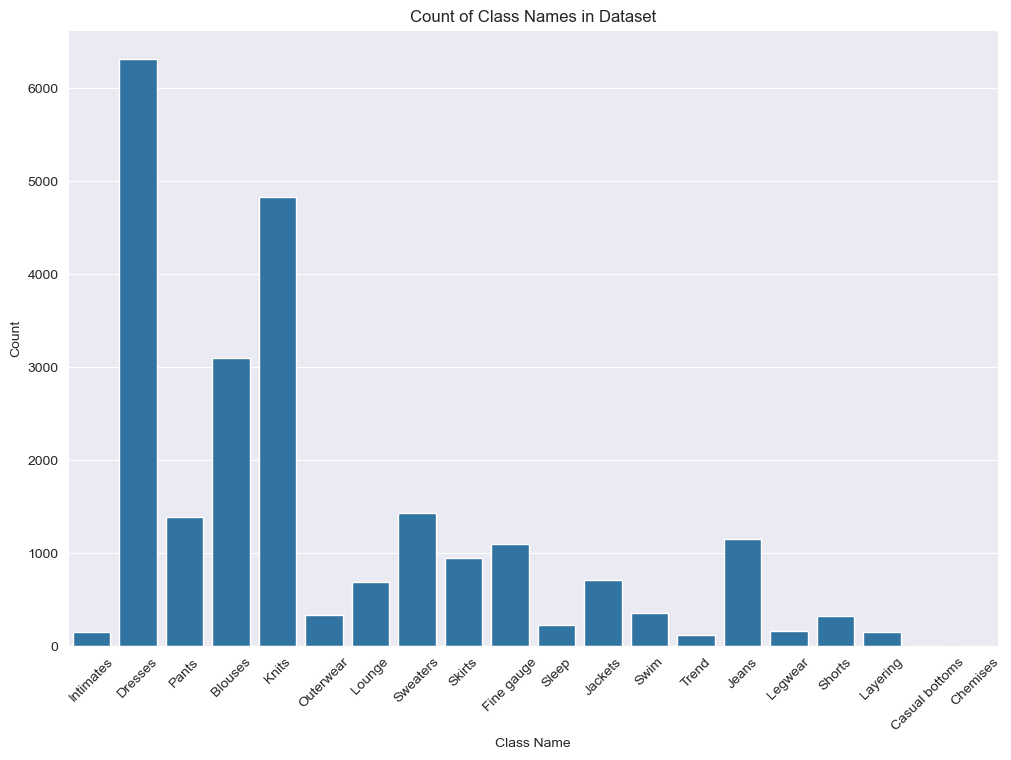

In [20]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.countplot(x='Class Name', data=data, )
plt.title('Count of Class Names in Dataset')
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [21]:
data['Class Name'].value_counts()

Class Name
Dresses           6312
Knits             4835
Blouses           3093
Sweaters          1428
Pants             1388
Jeans             1146
Fine gauge        1099
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: count, dtype: int64

In [23]:
data['Department Name'].value_counts()

Department Name
Tops        10455
Dresses      6312
Bottoms      3798
Intimate     1735
Jackets      1032
Trend         119
Name: count, dtype: int64

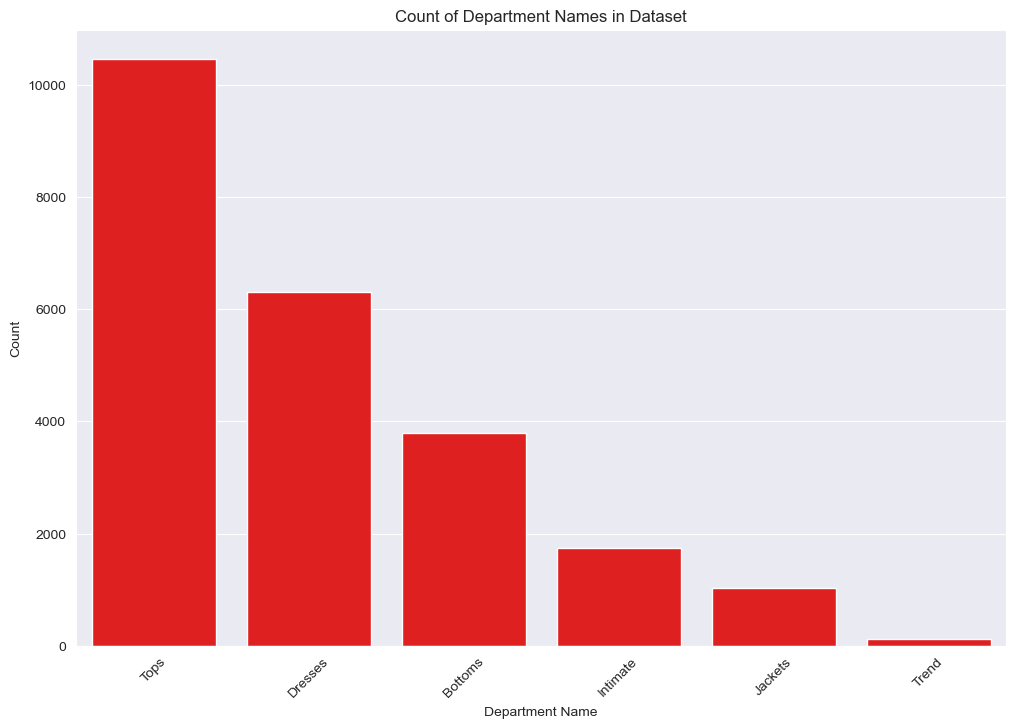

In [26]:
# Cloth department analysis
plt.figure(figsize=(12,8))
sns.countplot(x='Department Name', data=data, order=data['Department Name'].value_counts().index, linewidth=1, color='r')
plt.title('Count of Department Names in Dataset')
plt.xlabel('Department Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

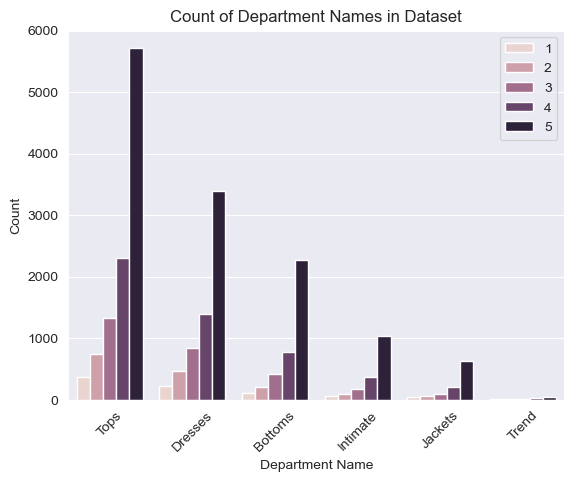

In [28]:
# Department ratings
sns.countplot(x='Department Name', data=data, order=data['Department Name'].value_counts().index, hue='Rating', linewidth=1)
plt.title('Count of Department Names in Dataset')
plt.xlabel('Department Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()

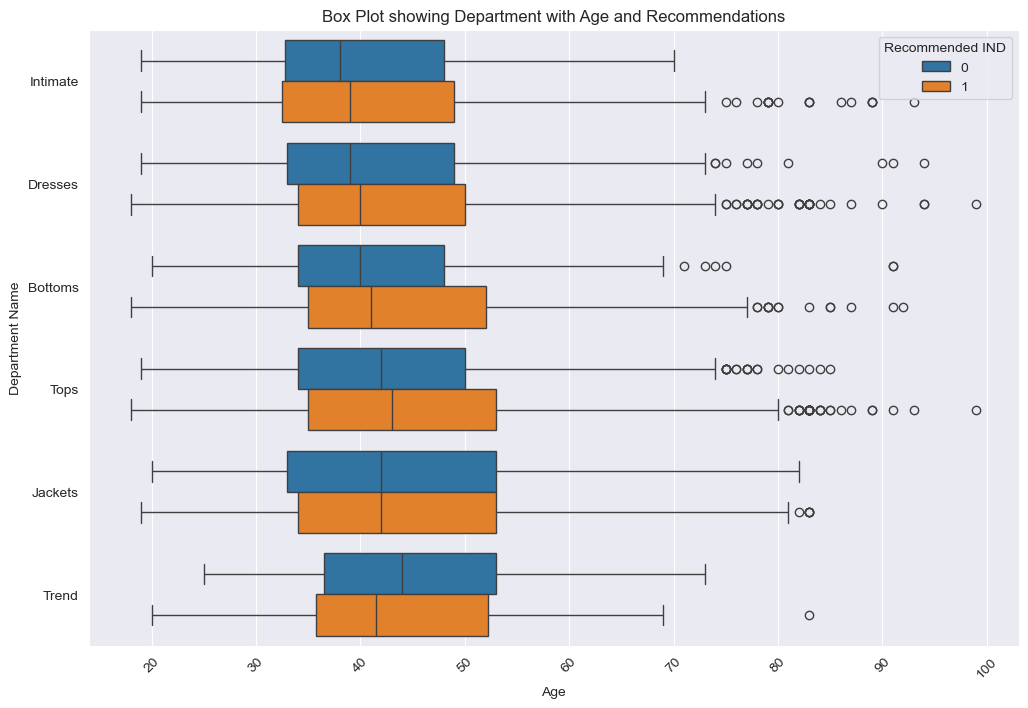

In [33]:
# Cloth department by Age, and Recommendation
plt.figure(figsize=(12,8))
sns.boxplot(x='Age', y='Department Name', data=data, hue='Recommended IND')
plt.title('Box Plot showing Department with Age and Recommendations')
plt.xlabel('Age')
plt.ylabel('Department Name')
plt.xticks(rotation=45)
plt.show()

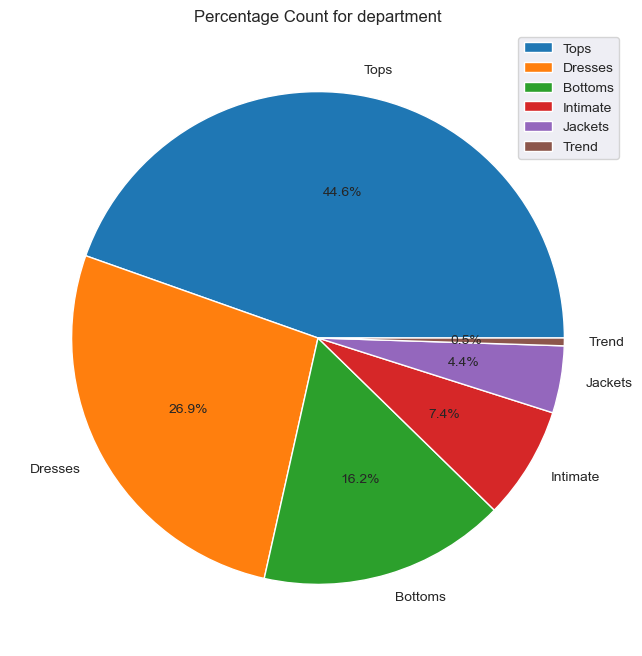

In [53]:
# Clothing Department Distribution
plt.figure(figsize=(12,8))
plt.pie(data['Department Name'].value_counts(), labels=data['Department Name'].value_counts().index ,autopct='%1.1f%%')
plt.title('Percentage Count for department')
plt.legend()
plt.show()

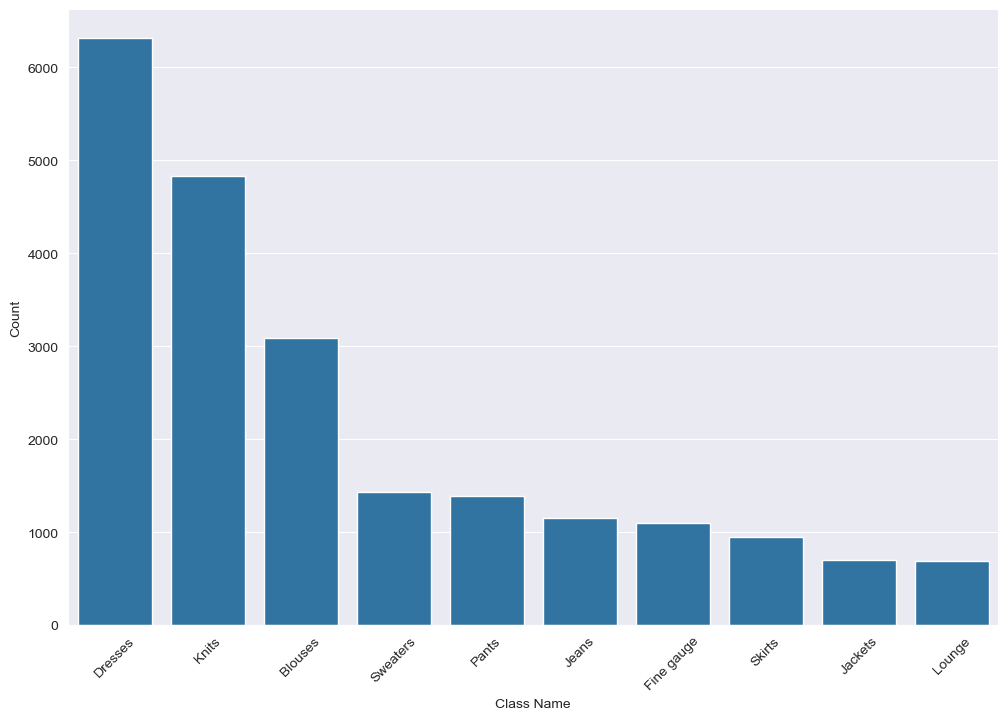

In [56]:
# Cloth Class Analysis
plt.figure(figsize=(12,8))
sns.countplot(x='Class Name', data=data, order=data['Class Name'].value_counts().index[0:10],)
plt.xticks(rotation=45)
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.show()

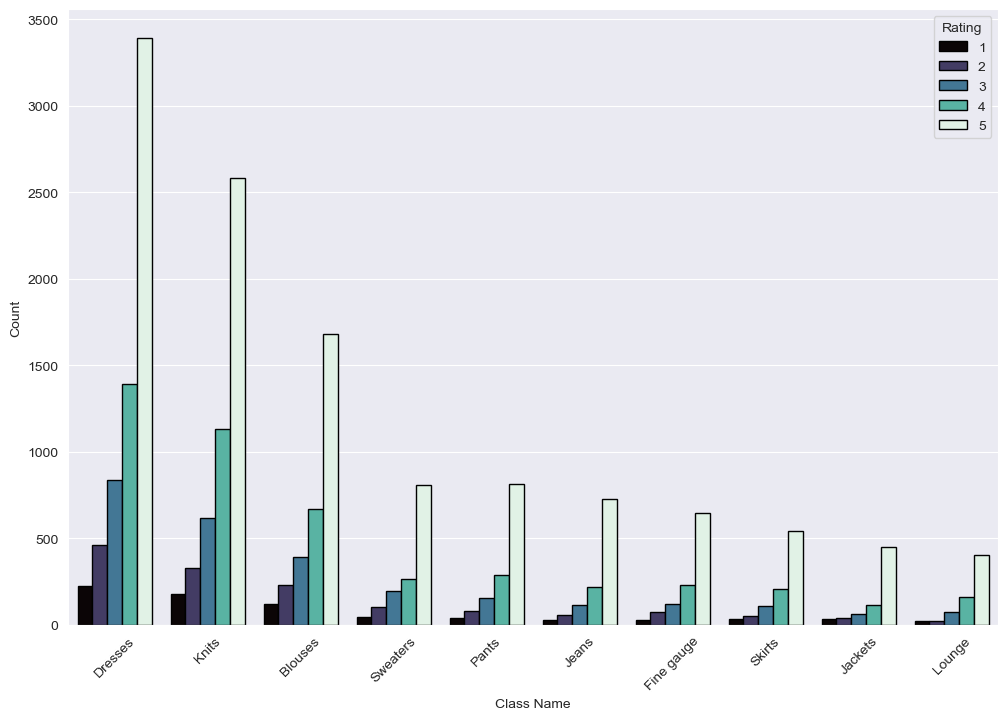

In [60]:
# Cloth Analysis By Ratings
plt.figure(figsize=(12,8))
sns.countplot(x='Class Name', data=data, order=data['Class Name'].value_counts().index[0:10],hue='Rating', palette='mako', linewidth=1, edgecolor='black')
plt.xticks(rotation=45)
plt.xlabel('Class Name')
plt.ylabel('Count')
plt.show()

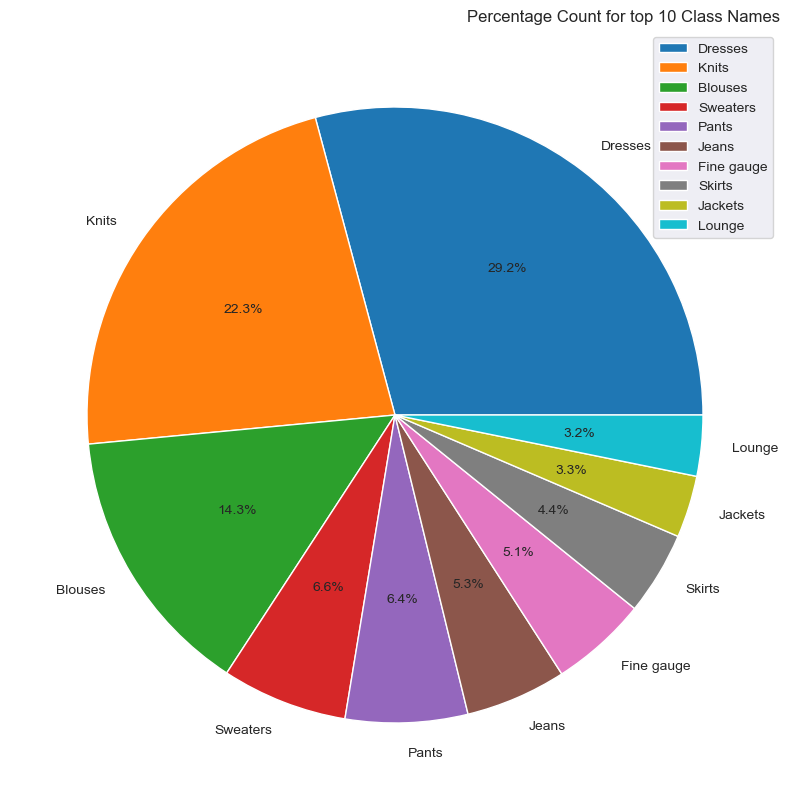

In [67]:
# Cloth Distribution
plt.figure(figsize=(14,10))
plt.pie(data['Class Name'].value_counts().values[0:10], labels=data['Class Name'].value_counts().index[0:10], autopct='%1.1f%%')
plt.legend()
plt.title('Percentage Count for top 10 Class Names', loc='right')
plt.show()

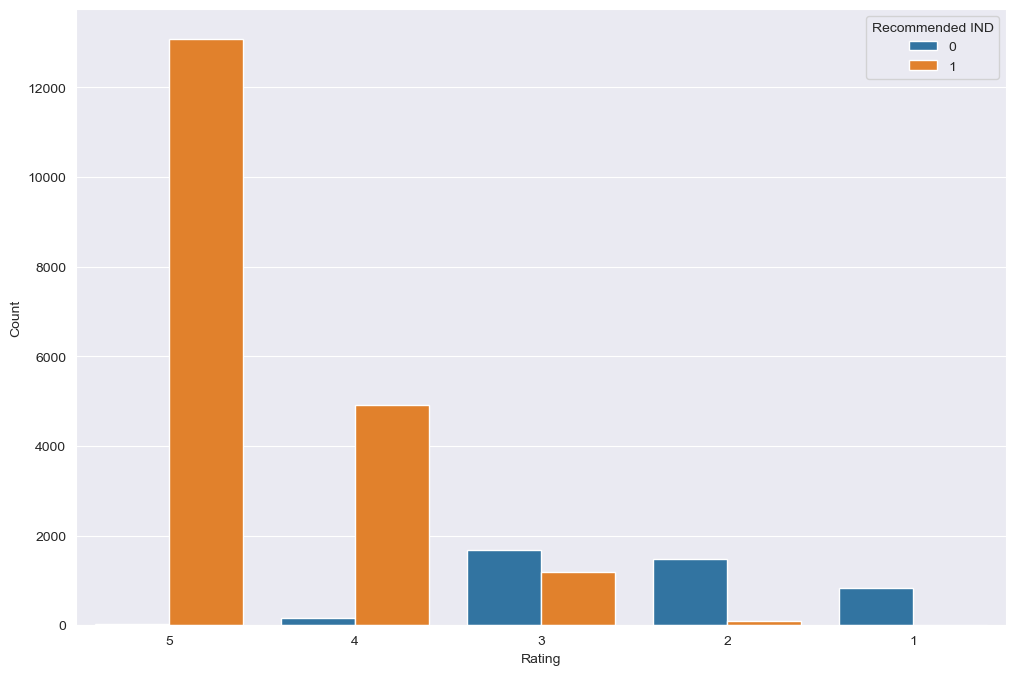

In [70]:
# Ratings Distribution
plt.figure(figsize=(12,8))
sns.countplot(x='Rating', data=data, order=data['Rating'].value_counts().index,hue='Recommended IND')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [79]:
data.groupby(['Recommended IND', 'Rating']).size()

Recommended IND  Rating
0                1           826
                 2          1471
                 3          1682
                 4           168
                 5            25
1                1            16
                 2            94
                 3          1189
                 4          4908
                 5         13086
dtype: int64

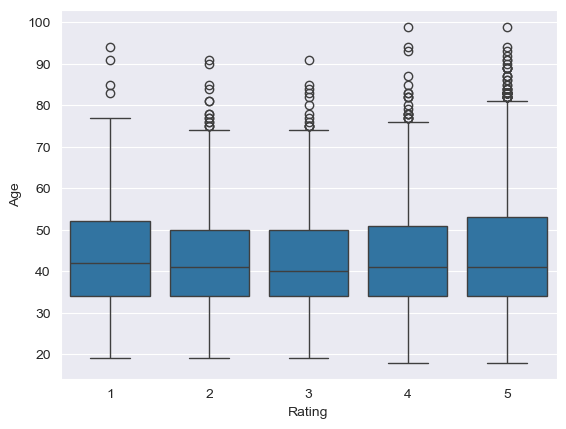

In [98]:
# Rating distribution By Age
sns.boxplot(data=data, x='Rating',y='Age')
plt.show()

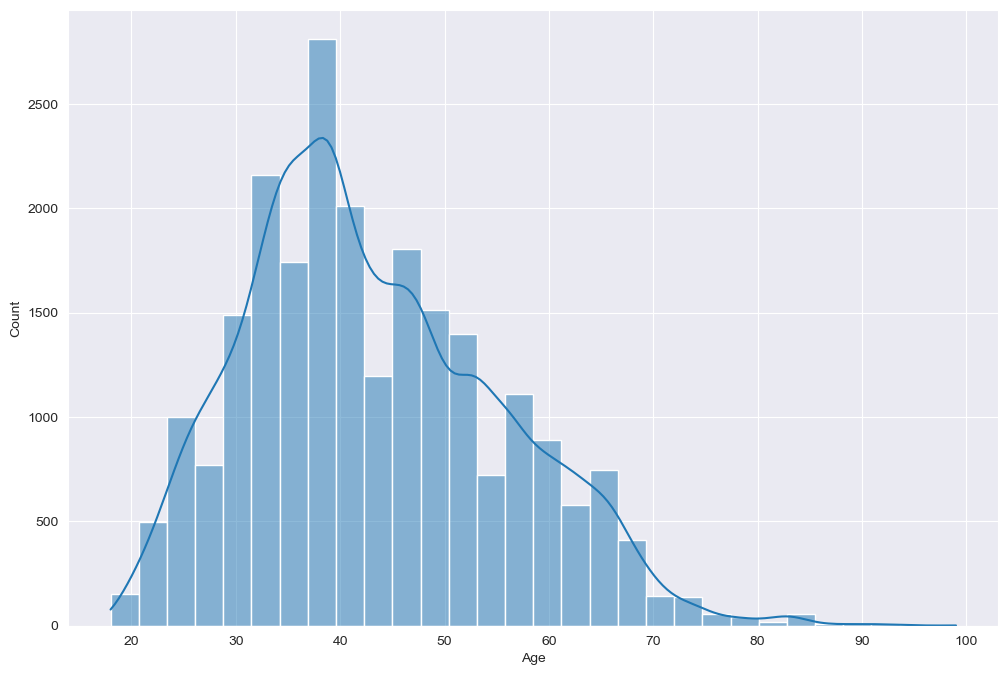

In [95]:
# Age Distribution
plt.figure(figsize=(12,8))
sns.histplot(data=data, x='Age', kde=True, bins=30)
plt.show()

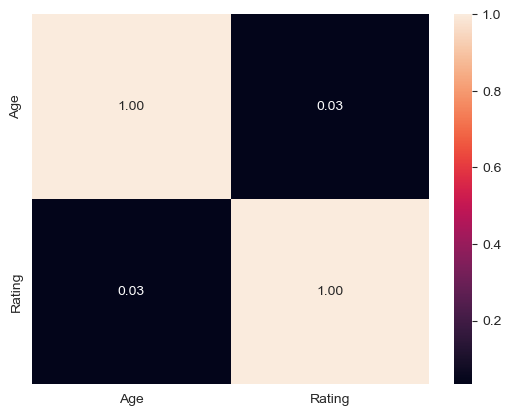

In [115]:
# Heatmap or correlation Matrix
h = data.drop('Clothing ID', axis=1)
h = h.dropna()
sns.heatmap(data=h[['Age', 'Rating']].corr(), annot=True, fmt='.2f')
plt.show()

In [107]:
h.dtypes

Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object